# Open exploration

## Exploring behaviour

In [4]:
# import packages
from ema_workbench import ema_logging, load_results, Scenario
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ema_logging.log_to_stderr(ema_logging.INFO)

file_name = './Data/results_o_e7_zeropol100.tar.gz' #./Data/results_o_e7_new.tar.gz
experiments, outcomes = load_results(file_name)


[MainProcess/INFO] results loaded succesfully from C:\Users\irene\EMA\Data\results_o_e7_zeropol100.tar.gz


In [5]:
del outcomes['TIME']


{'Average food provision by MF': array([0.0394007 , 0.14425166, 0.12704788, 0.01973152, 0.28549153,
        0.02899006, 0.22162406, 0.35752496, 0.12508868, 0.25404823,
        0.01300496, 0.37656483, 0.16130748, 0.31906524, 0.02820513,
        0.03130796, 0.14216383, 0.02562536, 0.0236414 , 0.3154324 ,
        0.04730209, 0.02310398, 0.04028053, 0.02871577, 0.01493271,
        0.2895797 , 0.356761  , 0.03751836, 0.03485086, 0.02351722,
        0.0280353 , 0.11926121, 0.03720868, 0.02322354, 0.2790714 ,
        0.02200263, 0.03790839, 0.13112329, 0.03222007, 0.20368944,
        0.04367063, 0.22331643, 0.23409164, 0.3656874 , 0.13279645,
        0.02773812, 0.38992527, 0.25969645, 0.02215628, 0.30919233,
        0.03585113, 0.5131288 , 0.42776862, 0.02180599, 0.47499335,
        0.55569625, 0.02449056, 0.03216178, 0.2236304 , 0.53466046,
        0.02701888, 0.24527076, 0.05108995, 0.15176648, 0.03582677,
        0.02643755, 0.21196167, 0.04122878, 0.20007694, 0.04381922,
        0.550639

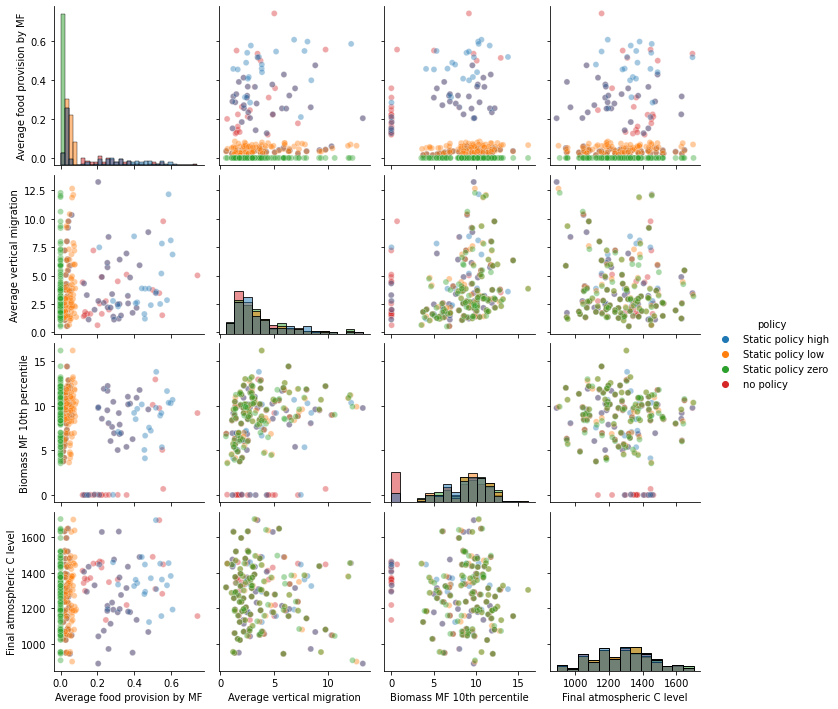

In [6]:
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

sns.pairplot(data, hue='policy', vars=outcomes.keys(), diag_kind='hist', plot_kws={'alpha':0.4} )
plt.savefig('Figures/pairplot_oe7_zeropol.png')
plt.show()



## Defining the reference scenario

In [32]:
file_name = './Data/results_oe_wcs7.tar.gz'
experiments, outcomes = load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\irene\EMA\Data\results_oe_wcs7.tar.gz


In [33]:
del outcomes['TIME']

In [34]:
outcomes = pd.DataFrame.from_dict(outcomes)

index_worst_case = outcomes['Final atmospheric C level'].idxmax()

worst_case = experiments.iloc[index_worst_case]
worst_case=worst_case.to_dict()

split_idx = -4
worst_case = dict(list(worst_case.items())[:split_idx])

Scenario({'C content copepods': 0.4953719065838029, 'Catchability myctophidae': 0.09394581802293928, 'Consumption by MF in bodyweight': 7.624438318949381, 'Consumption by zooplankton in bodyweight': 2.718235730961183, 'Conversion factor to ppm': 2.229903629345519, 'Depth euphotic zone': 108.6213435262702, 'Downwelling water': 1409652740145935.8, 'Female fraction': 0.4370404121552624, 'Fishmeal to fish factor': 4.706407865844137, 'Fraction grazed C ending up in surface': 0.5184917115127994, 'Fraction spawning mauriculus vs myctophidae': 0.6899077817258453, 'Grazing in surface by MF': 0.31492030081132383, 'Initial surface C': 604.541199511406, 'Initial weight adult MF': 9.748824700877329, 'Initial weight juvinile MF': 0.6715159261578895, 'Initial zooplankton': 3.5993934535877603, 'Residence time deep carbon': 904.1107205930556, 'SWITCH lanternfish to mauriculus': 0.5775324837154046, 'Spawning fraction': 0.19557565050837236, 'Surface ocean': 382517944113235.5, 'Switch price change': 1, 'S

## Defining minima and maxima

In [37]:
max_outcomes = outcomes.max()
min_outcomes = outcomes.min()

In [38]:
min_outcomes

Average food provision by MF    8.504182e-03
Average vertical migration      5.113081e-01
Biomass MF 10th percentile      7.569002e-21
Final atmospheric C level       7.328465e+02
dtype: float64

In [39]:
max_outcomes

Average food provision by MF       0.920419
Average vertical migration        19.168451
Biomass MF 10th percentile        16.681265
Final atmospheric C level       1806.749900
dtype: float64